<a href="https://colab.research.google.com/github/palak-oza/Codind_club_practice/blob/main/DL_ASSIGNMENT2_cnn_fashion_mnst_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

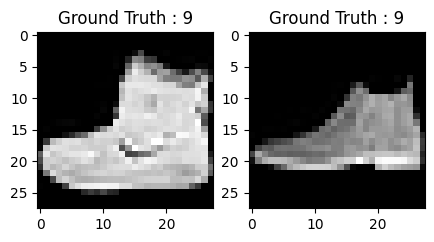

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# trainYohe=encoder.fit_transform(train_Y.reshape(-1,1))
# testYohe=encoder.fit_transform(test_Y.reshape(-1,1))
# one_hot_train = trainYohe.toarray()
# one_hot_test = testYohe.toarray()
# print("train: ",one_hot_train[0])
# print("test: ",one_hot_test[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

https://www.datacamp.com/tutorial/convolutional-neural-networks-python

In [10]:
!pip install keras

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU

In [12]:
#from keras.models import Input
from keras.models import Model

In [13]:
batch_size = 64
epochs = 25
num_classes = 10


In [14]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [16]:
fashion_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/25
750/750 [==============================] - 9s 6ms/step - loss: 0.4625 - accuracy: 0.8316 - val_loss: 0.3247 - val_accuracy: 0.8800
Epoch 2/25
750/750 [==============================] - 4s 6ms/step - loss: 0.2872 - accuracy: 0.8954 - val_loss: 0.2791 - val_accuracy: 0.8988
Epoch 3/25
750/750 [==============================] - 4s 5ms/step - loss: 0.2367 - accuracy: 0.9136 - val_loss: 0.2562 - val_accuracy: 0.9085
Epoch 4/25
750/750 [==============================] - 5s 6ms/step - loss: 0.2073 - accuracy: 0.9233 - val_loss: 0.2261 - val_accuracy: 0.9198
Epoch 5/25
750/750 [==============================] - 8s 11ms/step - loss: 0.1796 - accuracy: 0.9336 - val_loss: 0.2246 - val_accuracy: 0.9207
Epoch 6/25
750/750 [==============================] - 8s 11ms/step - loss: 0.1554 - accuracy: 0.9425 - val_loss: 0.2495 - val_accuracy: 0.9167
Epoch 7/25
750/750 [==============================] - 6s 8ms/step - loss: 0.1380 - accuracy: 0.9477 - val_loss: 0.2353 - val_accuracy: 0.9207
Epoc

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.5520817637443542
Test accuracy: 0.9162999987602234


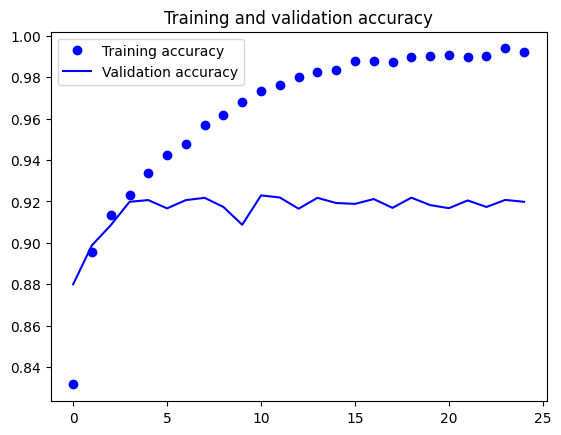

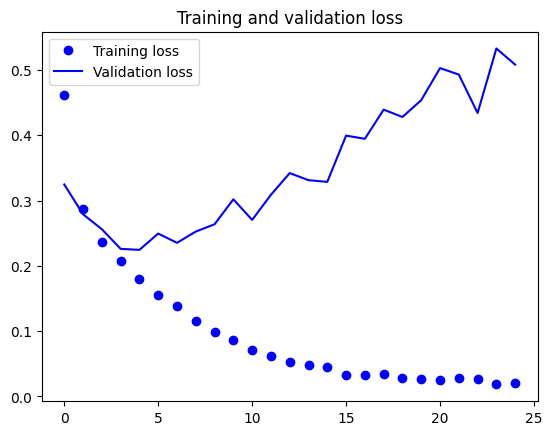

In [20]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding Dropout into the Network

In [21]:
batch_size = 64
epochs = 25
num_classes = 10


In [22]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [23]:
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [24]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [25]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/25
750/750 [==============================] - 8s 7ms/step - loss: 0.6084 - accuracy: 0.7745 - val_loss: 0.3808 - val_accuracy: 0.8587
Epoch 2/25
750/750 [==============================] - 8s 10ms/step - loss: 0.3836 - accuracy: 0.8581 - val_loss: 0.3211 - val_accuracy: 0.8805
Epoch 3/25
750/750 [==============================] - 7s 10ms/step - loss: 0.3323 - accuracy: 0.8781 - val_loss: 0.2803 - val_accuracy: 0.8971
Epoch 4/25
750/750 [==============================] - 8s 10ms/step - loss: 0.3060 - accuracy: 0.8868 - val_loss: 0.2672 - val_accuracy: 0.9004
Epoch 5/25
750/750 [==============================] - 8s 10ms/step - loss: 0.2864 - accuracy: 0.8947 - val_loss: 0.2651 - val_accuracy: 0.9020
Epoch 6/25
750/750 [==============================] - 7s 9ms/step - loss: 0.2697 - accuracy: 0.8998 - val_loss: 0.2585 - val_accuracy: 0.9022
Epoch 7/25
750/750 [==============================] - 7s 9ms/step - loss: 0.2632 - accuracy: 0.9025 - val_loss: 0.2337 - val_accuracy: 0.9125
Ep

In [26]:
fashion_model.save("fashion_model_dropout.h5py")


In [27]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


313/313 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.9215


In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.2208070009946823
Test accuracy: 0.921500027179718


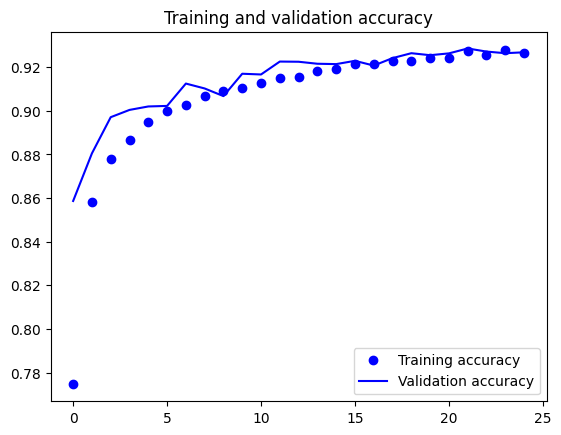

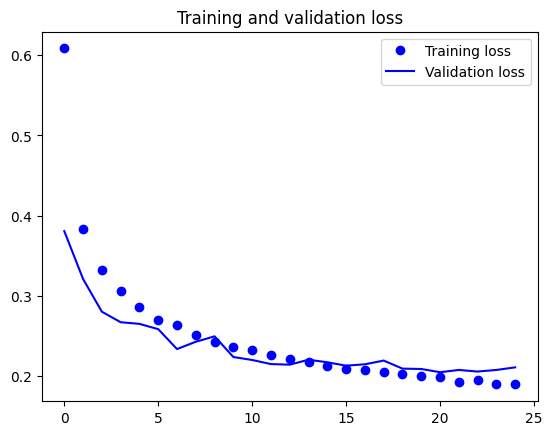

In [29]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [30]:
predicted_classes = fashion_model.predict(test_X)


313/313 [==============================] - 1s 2ms/step


In [31]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [32]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9182 correct labels


<ipython-input-33-0178221d62f4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


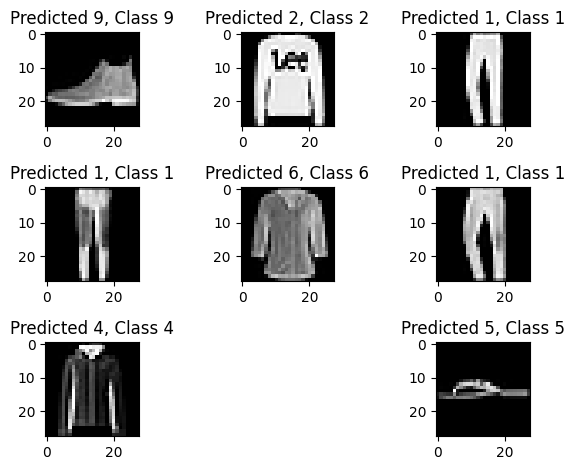

In [33]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()


Found 818 incorrect labels


<ipython-input-34-0bf9e7d6e015>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


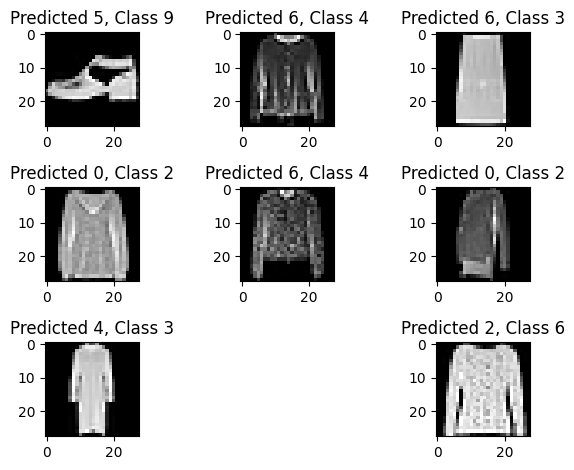

In [34]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [35]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.80      0.86      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.88      0.88      1000
     Class 3       0.94      0.91      0.93      1000
     Class 4       0.89      0.85      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.76      0.78      0.77      1000
     Class 7       0.96      0.97      0.97      1000
     Class 8       1.00      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

